In [2]:
# Step 1: Load the Excel file 

#Load the data using pandas libary to load the csv file into data frame for analysis 
import pandas as pd

# Load the Excel file into a DataFrame
file_path = "/Users/jagadish/Downloads/supply chain logisitcs problem.xlsx"
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
print(df.head())


       Order ID Order Date Origin Port Carrier  TPT Service Level  \
0  1.447296e+09 2013-05-26      PORT09   V44_3    1           CRF   
1  1.447158e+09 2013-05-26      PORT09   V44_3    1           CRF   
2  1.447139e+09 2013-05-26      PORT09   V44_3    1           CRF   
3  1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   
4  1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   

   Ship ahead day count  Ship Late Day count   Customer  Product ID  \
0                     3                    0  V55555_53     1700106   
1                     3                    0  V55555_53     1700106   
2                     3                    0  V55555_53     1700106   
3                     3                    0  V55555_53     1700106   
4                     3                    0  V55555_53     1700106   

  Plant Code Destination Port  Unit quantity  Weight  
0    PLANT16           PORT09            808   14.30  
1    PLANT16           PORT09           3188   8

In [3]:
# STEP 2: EXPLORE THE DATA

# Check the structure of the dataset
print(df.info())  #Data types and null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9215 entries, 0 to 9214
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order ID              9215 non-null   float64       
 1   Order Date            9215 non-null   datetime64[ns]
 2   Origin Port           9215 non-null   object        
 3   Carrier               9215 non-null   object        
 4   TPT                   9215 non-null   int64         
 5   Service Level         9215 non-null   object        
 6   Ship ahead day count  9215 non-null   int64         
 7   Ship Late Day count   9215 non-null   int64         
 8   Customer              9215 non-null   object        
 9   Product ID            9215 non-null   int64         
 10  Plant Code            9215 non-null   object        
 11  Destination Port      9215 non-null   object        
 12  Unit quantity         9215 non-null   int64         
 13  Weight            

In [4]:
# Summary Statistics 
print(df.describe())

           Order ID           Order Date          TPT  Ship ahead day count  \
count  9.215000e+03                 9215  9215.000000           9215.000000   
mean   1.447274e+09  2013-05-26 00:00:00     1.717743              1.852306   
min    1.447126e+09  2013-05-26 00:00:00     0.000000              0.000000   
25%    1.447197e+09  2013-05-26 00:00:00     1.000000              0.000000   
50%    1.447276e+09  2013-05-26 00:00:00     2.000000              3.000000   
75%    1.447346e+09  2013-05-26 00:00:00     2.000000              3.000000   
max    1.447425e+09  2013-05-26 00:00:00     4.000000              6.000000   
std    8.381629e+04                  NaN     0.630500              1.922302   

       Ship Late Day count    Product ID  Unit quantity       Weight  
count          9215.000000  9.215000e+03    9215.000000  9215.000000  
mean              0.039935  1.680536e+06    3202.747151    19.871688  
min               0.000000  1.613321e+06     235.000000     0.000000  
25% 

In [5]:
# Check for missing values 
print(df.isnull())

      Order ID  Order Date  Origin Port  Carrier    TPT  Service Level  \
0        False       False        False    False  False          False   
1        False       False        False    False  False          False   
2        False       False        False    False  False          False   
3        False       False        False    False  False          False   
4        False       False        False    False  False          False   
...        ...         ...          ...      ...    ...            ...   
9210     False       False        False    False  False          False   
9211     False       False        False    False  False          False   
9212     False       False        False    False  False          False   
9213     False       False        False    False  False          False   
9214     False       False        False    False  False          False   

      Ship ahead day count  Ship Late Day count  Customer  Product ID  \
0                    False            

In [6]:
# Step 3 : Clean the Data 

# Remove Duplicates
df = df.drop_duplicates()

# Fill or drop Missing Values
df = df.fillna(0)  # Meaning Replace NaN values with 0

# or
df= df.dropna() # Drop rows with NaN values

In [8]:
# Average number of late days
print("Average late days:", df['Ship Late Day count'].mean())


Average late days: 0.03993488876831253


In [9]:
# Average late days by carrier
print(df.groupby('Carrier')['Ship Late Day count'].mean())


Carrier
V444_0    0.054438
V444_1    0.012876
V44_3     0.000000
Name: Ship Late Day count, dtype: float64


In [10]:
# Top 5 early shipments
print(df.sort_values('Ship ahead day count', ascending=False).head(5))


          Order ID Order Date Origin Port Carrier  TPT Service Level  \
7054  1.447299e+09 2013-05-26      PORT04  V444_0    2           DTP   
3747  1.447288e+09 2013-05-26      PORT04  V444_0    2           DTP   
3787  1.447298e+09 2013-05-26      PORT04  V444_0    2           DTP   
3899  1.447288e+09 2013-05-26      PORT04  V444_0    2           DTP   
8369  1.447322e+09 2013-05-26      PORT04  V444_1    1           DTD   

      Ship ahead day count  Ship Late Day count           Customer  \
7054                     6                    6      V555555555_14   
3747                     6                    6      V555555555_14   
3787                     6                    6      V555555555_14   
3899                     6                    6      V555555555_14   
8369                     5                    0  V55555555555555_8   

      Product ID Plant Code Destination Port  Unit quantity    Weight  
7054     1696260    PLANT08           PORT09           1690  8.027547  
37

In [11]:
# Customers with the most orders
print(df['Customer'].value_counts().head(5))


Customer
V55555555555555_8    976
V555555_6            762
V55555_2             758
V5555555_22          693
V5555_33             691
Name: count, dtype: int64


In [13]:
#Top 5 products by total quantity shipped
print(df.groupby('Product ID')['Unit quantity'].sum().sort_values(ascending=False).head(5))

Product ID
1684862    3470409
1676592    1119252
1700569     904493
1664051     873011
1667927     814076
Name: Unit quantity, dtype: int64


In [14]:
# Busiest origin and destination ports
print(df['Origin Port'].value_counts().head(5))
print(df['Destination Port'].value_counts().head(5))


Origin Port
PORT04    9041
PORT09     173
PORT05       1
Name: count, dtype: int64
Destination Port
PORT09    9215
Name: count, dtype: int64


In [15]:
# Plant with the most shipments
print(df['Plant Code'].value_counts().head(5))

Plant Code
PLANT03    8541
PLANT12     300
PLANT16     173
PLANT08     102
PLANT13      86
Name: count, dtype: int64


In [16]:
#Step 5: Visualize the Data
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


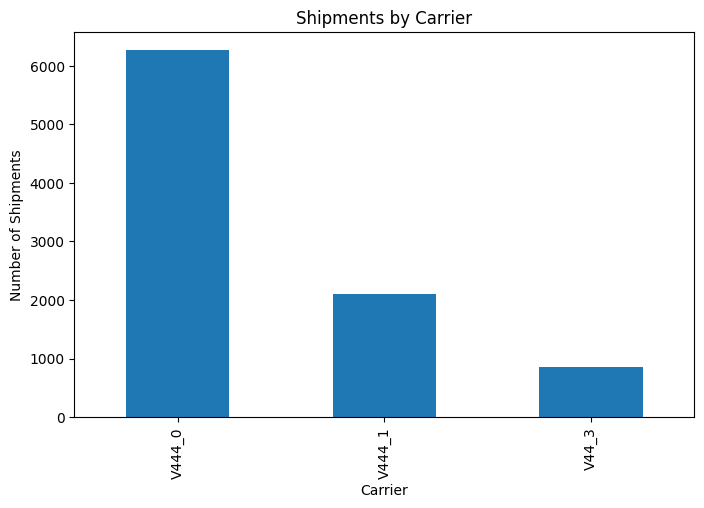

In [17]:
# Total shipments by carrier
carrier_counts = df['Carrier'].value_counts()
carrier_counts.plot(kind='bar', figsize=(8, 5), title="Shipments by Carrier")
plt.xlabel("Carrier")
plt.ylabel("Number of Shipments")
plt.show()

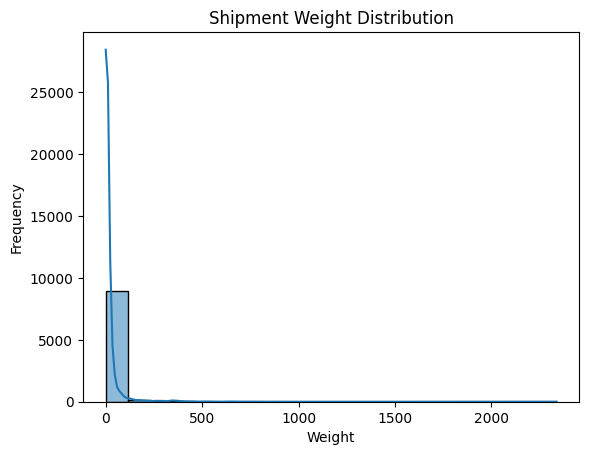

In [19]:
# Weight distribution
sns.histplot(df['Weight'], bins=20, kde=True)
plt.title("Shipment Weight Distribution")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.show()

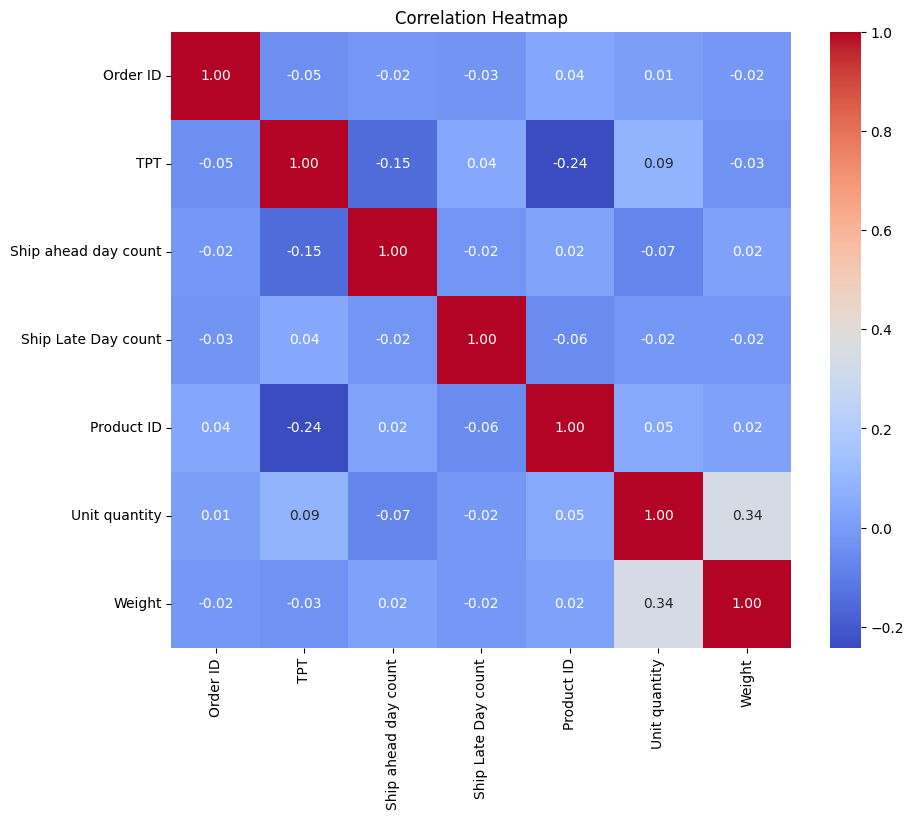

In [21]:
# Correlation heatmap
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [22]:
import numpy as np

# Calculate average and standard deviation
mean_weight = np.mean(df['Weight'])
std_weight = np.std(df['Weight'])

# Identify outliers (weights > mean + 2*std)
outliers = df[df['Weight'] > (mean_weight + 2 * std_weight)]
print(outliers)


          Order ID Order Date Origin Port Carrier  TPT Service Level  \
17    1.447139e+09 2013-05-26      PORT09   V44_3    1           CRF   
18    1.447309e+09 2013-05-26      PORT09   V44_3    1           CRF   
21    1.447352e+09 2013-05-26      PORT09   V44_3    1           CRF   
22    1.447212e+09 2013-05-26      PORT09   V44_3    1           CRF   
23    1.447233e+09 2013-05-26      PORT09   V44_3    1           CRF   
...            ...        ...         ...     ...  ...           ...   
8038  1.447387e+09 2013-05-26      PORT04  V444_1    1           DTD   
8041  1.447339e+09 2013-05-26      PORT04  V444_1    1           DTD   
8042  1.447361e+09 2013-05-26      PORT04  V444_1    1           DTD   
8050  1.447361e+09 2013-05-26      PORT04  V444_1    1           DTD   
8293  1.447160e+09 2013-05-26      PORT04  V444_1    1           DTD   

      Ship ahead day count  Ship Late Day count                Customer  \
17                       3                    0             